In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv('IOT-temp.csv')
df.head()

id  room_id/id        noted_date  temp  \
0  __export__.temp_log_196134_bd201015  Room Admin  08-12-2018 09:30    29   
1  __export__.temp_log_196131_7bca51bc  Room Admin  08-12-2018 09:30    29   
2  __export__.temp_log_196127_522915e3  Room Admin  08-12-2018 09:29    41   
3  __export__.temp_log_196128_be0919cf  Room Admin  08-12-2018 09:29    41   
4  __export__.temp_log_196126_d30b72fb  Room Admin  08-12-2018 09:29    31   

  out/in  
0     In  
1     In  
2    Out  
3    Out  
4     In

In [24]:
pd.value_counts(df["room_id/id"].unique())

Room Admin    1
dtype: int64

In [25]:
df.drop(["room_id/id"], axis = 1, inplace = True) 
df.head()

id        noted_date  temp out/in
0  __export__.temp_log_196134_bd201015  08-12-2018 09:30    29     In
1  __export__.temp_log_196131_7bca51bc  08-12-2018 09:30    29     In
2  __export__.temp_log_196127_522915e3  08-12-2018 09:29    41    Out
3  __export__.temp_log_196128_be0919cf  08-12-2018 09:29    41    Out
4  __export__.temp_log_196126_d30b72fb  08-12-2018 09:29    31     In

In [26]:
df['noted_date']=pd.to_datetime(df['noted_date'])
df_new=df.set_index('noted_date')
df_new.head()

id  temp out/in
noted_date                                                           
2018-08-12 09:30:00  __export__.temp_log_196134_bd201015    29     In
2018-08-12 09:30:00  __export__.temp_log_196131_7bca51bc    29     In
2018-08-12 09:29:00  __export__.temp_log_196127_522915e3    41    Out
2018-08-12 09:29:00  __export__.temp_log_196128_be0919cf    41    Out
2018-08-12 09:29:00  __export__.temp_log_196126_d30b72fb    31     In

In [27]:
sum=df.groupby(df['out/in']).count()['id'].iloc[0]+df.groupby(df['out/in']).count()['id'].iloc[1]

print(" sensor'In' is {0} % and sensor'Out' is {1} % of total".format(round(df.groupby(df['out/in']).count()['id'].iloc[0]/sum*100),
    round(df.groupby(df['out/in']).count()['id'].iloc[1]/sum*100)))

 sensor'In' is 21 % and sensor'Out' is 79 % of total


In [28]:
df_new1=df_new.groupby(df_new.index).mean()
df_new2=df_new.groupby([df_new.index,"out/in"]).mean()

<AxesSubplot:xlabel='noted_date'>

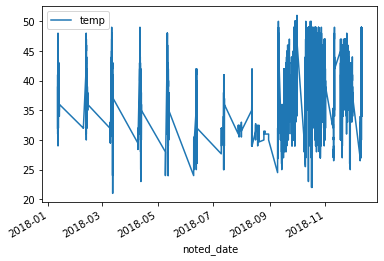

In [29]:
df_new1.plot()

In [30]:
pd.value_counts(df['noted_date'])

2018-12-09 03:09:00    65
2018-09-09 16:24:00    62
2018-09-09 17:31:00    53
2018-11-09 19:42:00    50
2018-09-09 16:08:00    50
                       ..
2018-11-22 21:23:00     1
2018-11-22 21:21:00     1
2018-10-21 05:41:00     1
2018-10-21 05:45:00     1
2018-10-21 21:54:00     1
Name: noted_date, Length: 27920, dtype: int64

In [31]:
df_new2.loc['2018-12-09 03:09:00']

temp
out/in           
In      28.473684
Out     28.500000

In [32]:
df_new_in=df_new[df_new["out/in"]=="In"].groupby(["noted_date"]).mean()
df_new_out=df_new[df_new["out/in"]=="Out"].groupby(["noted_date"]).mean()

Text(0, 0.5, 'temperature')

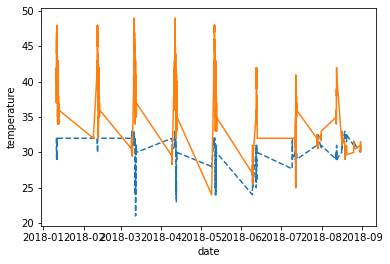

In [33]:
plt.plot(df_new_in.loc[:'2018-9-09 03:09:00'], '--')
plt.plot(df_new_out.loc[:'2018-9-09 03:09:00'], '-')
plt.xlabel('date')
plt.ylabel('temperature')

In [34]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest
df_new1
df_new1_mm = minmax_scale(df_new1)
scaler = StandardScaler()
df_new1_ss = scaler.fit_transform(df_new1)

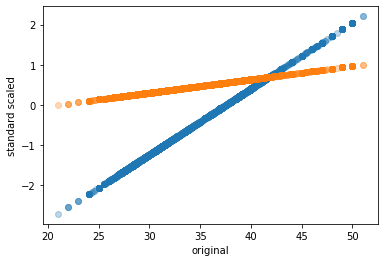

In [35]:
plt.scatter(df_new1, df_new1_ss, alpha=0.3)
plt.scatter(df_new1, df_new1_mm, alpha=0.3)

plt.ylabel("standard scaled")
plt.xlabel("original");

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_new1_ss, model='additive', period=52)

In [37]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
h=sm.tsa.arima.ARIMA(endog=df_new1_ss,order=(1,1,3))
model=h.fit()

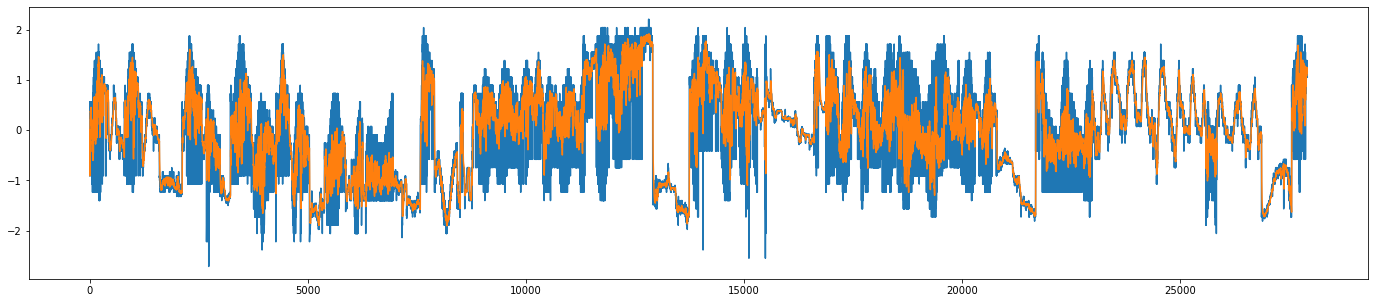

In [38]:
plt.figure(figsize=(24,5))
plt.plot(df_new1_ss)
plt.plot(model.predict())
plt.show()